In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mne

In [3]:
raw = mne.io.read_raw_edf('SC4001E0-PSG (2).edf')
annot = mne.read_annotations('SC4001EC-Hypnogram.edf')
raw.set_annotations(annot,emit_warning=False)

Extracting EDF parameters from C:\Users\HP\project\tutorial\SC4001E0-PSG (2).edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | SC4001E0-PSG (2).edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>

Using matplotlib as 2D backend.


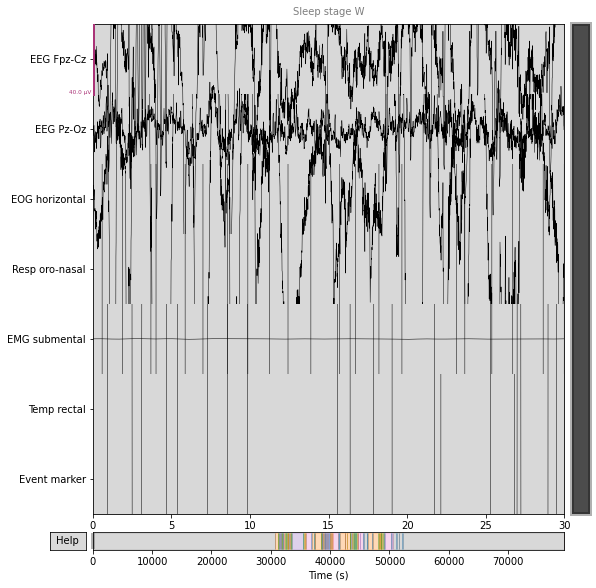

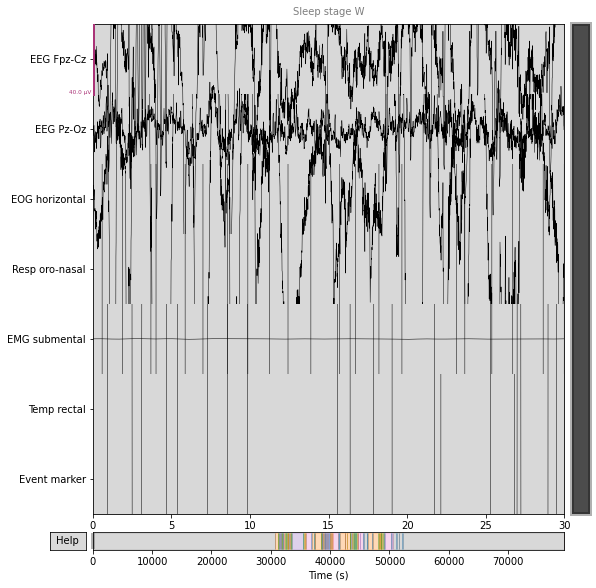

In [4]:
raw.plot(start=0,duration=30)

In [5]:
data = raw.get_data()
df = pd.DataFrame(data)
df = df.transpose()
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
7949995,0.000011,-6.882051e-06,0.000082,120.019895,0.000003,37.430325,884.192595
7949996,0.000004,-8.609524e-06,0.000062,119.233020,0.000003,37.430079,883.955098
7949997,0.000005,-3.043223e-06,0.000070,118.437162,0.000003,37.429827,883.717035
7949998,-0.000005,-3.715018e-06,0.000081,117.632748,0.000003,37.429568,883.478461


In [6]:
annot_df = annot.to_data_frame()
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,Sleep stage W
1,1970-01-01 08:30:30,120.0,Sleep stage 1
2,1970-01-01 08:32:30,390.0,Sleep stage 2
3,1970-01-01 08:39:00,30.0,Sleep stage 3
4,1970-01-01 08:39:30,30.0,Sleep stage 2
...,...,...,...
149,1970-01-01 14:19:00,30.0,Sleep stage 1
150,1970-01-01 14:19:30,540.0,Sleep stage W
151,1970-01-01 14:28:30,150.0,Sleep stage 1
152,1970-01-01 14:31:00,27240.0,Sleep stage W


In [7]:
label = {'Sleep stage 1':1,'Sleep stage 2':2,'Sleep stage 3':3,'Sleep stage W':0,'Sleep stage 4':3,'Sleep stage R':4,'Sleep stage ?':-1,'Movement time':-1}
annot_df['description'] = annot_df['description'].replace(label)
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,0
1,1970-01-01 08:30:30,120.0,1
2,1970-01-01 08:32:30,390.0,2
3,1970-01-01 08:39:00,30.0,3
4,1970-01-01 08:39:30,30.0,2
...,...,...,...
149,1970-01-01 14:19:00,30.0,1
150,1970-01-01 14:19:30,540.0,0
151,1970-01-01 14:28:30,150.0,1
152,1970-01-01 14:31:00,27240.0,0


In [8]:
annot_df.groupby(['description']).sum()

,duration
description,
-1,6900.0
0,59910.0
1,1740.0
2,7500.0
3,6600.0
4,3750.0


In [9]:
annot_list = []
for i in range(0,153):
    dur = int(annot_df.iloc[i,1])
    des = int(annot_df.iloc[i,2])
    for j in range(0,dur):
        annot_list.append(des)

In [10]:
cols = ['Stages']
annot_list = pd.DataFrame(annot_list,columns=cols)
annot_list

,Stages
0,0
1,0
2,0
3,0
4,0
...,...
79495,0
79496,0
79497,0
79498,0


In [11]:
df = df.iloc[0:79500]
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
79495,0.000033,1.068059e-05,0.000001,189.825492,0.000003,37.253137,905.379169
79496,0.000067,9.145055e-06,0.000002,189.069777,0.000003,37.253041,905.312811
79497,0.000025,7.993407e-06,-0.000031,188.308952,0.000003,37.252948,905.241653
79498,0.000032,7.609524e-06,-0.000053,187.543434,0.000003,37.252859,905.165756


In [12]:
df_stats = df.describe()

In [13]:
df_stats = df_stats.transpose()

In [14]:
df_stats

,count,mean,std,min,25%,50%,75%,max
0,79500.0,1.811138e-07,2.561919e-05,-0.000125,-0.000012,5.157509e-07,0.000013,0.000157
1,79500.0,-3.464879e-07,7.185456e-06,-0.000048,-0.000005,-4.520147e-07,0.000004,0.000056
2,79500.0,7.427894e-07,8.184781e-05,-0.000386,-0.000036,-2.463980e-07,0.000035,0.000445
3,79500.0,2.772545e+02,3.497052e+02,-907.900006,181.378693,2.211806e+02,317.617642,2015.034675
4,79500.0,3.422791e-06,7.126552e-08,0.000003,0.000003,3.422624e-06,0.000003,0.000004
5,79500.0,3.721832e+01,2.517206e-02,37.143711,37.200739,3.721811e+01,37.235538,37.325715
6,79500.0,8.896052e+02,5.765405e+01,-2.770382,879.616700,8.935192e+02,907.264523,1021.897795


In [15]:
def norm(x):
    return (x - df_stats['mean']) / df_stats['std']

df = norm(df)

In [16]:
df

,0,1,2,3,4,5,6
0,0.188754,-0.295167,0.192624,-2.171127,1.813066,-0.471340,0.527193
1,-0.107727,0.252439,0.186603,-2.158298,1.834960,-0.483177,0.514208
2,0.046004,-0.522223,0.108332,-2.144797,1.856496,-0.494663,0.501203
3,-0.100406,-0.321880,0.011998,-2.130625,1.877656,-0.505789,0.488190
4,-0.210214,-0.054755,0.084248,-2.115783,1.898424,-0.516544,0.475179
...,...,...,...,...,...,...,...
79495,1.283172,1.534638,0.005977,-0.250008,0.946352,1.383297,0.273597
79496,2.589885,1.320938,0.011998,-0.252169,0.930013,1.379503,0.272446
79497,0.975710,1.160663,-0.385380,-0.254344,0.913086,1.375822,0.271212
79498,1.250230,1.107238,-0.656320,-0.256533,0.895582,1.372258,0.269895


In [17]:
df.iloc[0,0]

0.18875446192609638

In [18]:
df.iloc[0,1]

-0.2951672478131336

In [19]:
a = annot_list.values

In [20]:
a[40000][0]

2

In [21]:
X0 = []
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []
X6 = []

for i in range(0,79500):
    if(a[i][0] == 4):
        X0.append(df.iloc[i,0])
        X1.append(df.iloc[i,1])
        X2.append(df.iloc[i,2])
        X3.append(df.iloc[i,3])
        X4.append(df.iloc[i,4])
        X5.append(df.iloc[i,5])
        X6.append(df.iloc[i,6])


In [22]:
X0

[0.481575277933981,
 0.41569059433220695,
 0.6023638645372335,
 0.08260691612323816,
 0.14849159972501222,
 0.3681072117309257,
 -0.17361129788366092,
 -0.4078679506899687,
 -0.3383230068880961,
 -0.26145754268602633,
 0.29124174752885595,
 -0.16995103768356237,
 -0.19557285908425226,
 -0.18825233868405514,
 -0.272438323286322,
 0.21071602312668772,
 -0.30538066508720907,
 0.05698509472254826,
 -0.37492560888908166,
 0.016722232521464108,
 0.7011908899398945,
 0.024042752921661227,
 -0.38224612928927876,
 0.32052382912964444,
 0.10822873752392806,
 -0.21387416008474505,
 -0.20655363968454796,
 -0.22485494068504072,
 -0.04184193068011283,
 -0.462771853691447,
 -0.8397786543015985,
 -0.38224612928927876,
 -0.7043490268979519,
 -0.4334897720906586,
 -0.6421246034962764,
 -0.5432975780936153,
 -0.41884873129026434,
 -0.6421246034962764,
 -0.5359770576934182,
 -1.3156124803144111,
 -0.8617402155021899,
 -1.2314264957121444,
 -0.7263105880985432,
 -0.9276248991039641,
 -0.8983428175031756,
 

In [23]:
X1

[-0.6023608260071478,
 -0.3085234903433081,
 -0.9763356168520347,
 -0.22838603516226094,
 -0.6557857961278459,
 -0.10817985239069013,
 -0.428729673114879,
 -0.682498281188195,
 1.1606631879758906,
 -0.8694856766106385,
 0.8000446396611781,
 0.8000446396611781,
 0.35928863616541856,
 0.2257262108636732,
 -0.4420859156450535,
 -0.428729673114879,
 -0.6958545237183695,
 0.13223251315245146,
 0.06545130050157881,
 0.2925074235145459,
 0.23908245339384776,
 0.09216378556192786,
 0.3993573637559421,
 0.11887627062227694,
 -0.01468615467946839,
 -0.4955108857657516,
 0.26579493845419677,
 0.2257262108636732,
 0.05209505797140428,
 0.15894499821280053,
 -0.2818110052829591,
 -0.1883173075717373,
 -0.856129434080464,
 -0.5756483409467986,
 -0.9496231317916856,
 -0.4687984007054026,
 -0.882841919140813,
 -0.1749610650415628,
 -0.001329912149293858,
 -0.6290733110674969,
 -0.709210766248544,
 -0.9095544042011621,
 -0.7492794938390677,
 -0.4955108857657516,
 -0.6424295535976714,
 -0.84277319155028

In [24]:
X2

[0.1564990269032616,
 0.1083319644907441,
 0.2528331517282966,
 0.048123136475097264,
 -0.04821098834993771,
 0.06618578487979132,
 -0.006064808738984911,
 0.054144019276661945,
 0.024039605268838516,
 -0.030148339945243654,
 0.04210225367353257,
 0.005976956864144461,
 -0.23485835519844298,
 -0.38538042523756005,
 -0.07831540235776115,
 -0.030148339945243654,
 -0.08433628515932583,
 -0.3131298316187839,
 -0.06627363675463177,
 -0.252921003603137,
 -0.2589418864047017,
 -0.16260776157966675,
 -0.252921003603137,
 -0.3552760112297367,
 -0.14454511317497268,
 -0.28904630041252516,
 -0.08433628515932583,
 -0.21077482399218422,
 -0.3432342456266073,
 -0.03616922274680834,
 -0.012085691540549597,
 -0.012085691540549597,
 -0.22883747239687827,
 -0.14454511317497268,
 -0.15056599597653736,
 -0.3010880660156545,
 -0.04821098834993771,
 -0.32517159722191324,
 -0.2950671832140898,
 -0.11444069916714925,
 -0.11444069916714925,
 -0.41548483924538354,
 -0.16862864438123143,
 -0.33119248002347795,
 

In [25]:
X3

[0.1480441924665854,
 0.14967164728867555,
 0.15124327648535327,
 0.15275838036448414,
 0.1542162978332563,
 0.1556164068258435,
 0.15695812470441822,
 0.15824090863324405,
 0.15946425592559896,
 0.16062770436329382,
 0.16173083248857598,
 0.16277325986821958,
 0.1637546473296295,
 0.16467469716880437,
 0.16553315333001747,
 0.16632980155710378,
 0.16706446951625134,
 0.16773702689022382,
 0.1683473854439482,
 0.16889549906144125,
 0.1693813637540419,
 0.16980501763996325,
 0.17016654089517666,
 0.1704660556756729,
 0.17070372601115721,
 0.1708797576702624,
 0.17099439799737395,
 0.17104793572119076,
 0.1710407007351579,
 0.17097306384992744,
 0.08219933570448718,
 0.08349796035800287,
 0.08473601701733359,
 0.08591298205947585,
 0.08702837616970012,
 0.08808176463427748,
 0.08907275759901888,
 0.0900010102934706,
 0.09086622322063742,
 0.09166814231212797,
 0.09240655904865233,
 0.0930813105458189,
 0.09369227960522025,
 0.09423939473080785,
 0.09472263011059832,
 0.09514200556377389,

In [26]:
X4

[-1.096553755734129,
 -1.1044828846846464,
 -1.1119759284018316,
 -1.1190351158694907,
 -1.12566298251862,
 -1.1318623680317388,
 -1.1376364139034778,
 -1.142988560759202,
 -1.1479225454326885,
 -1.1524423978044802,
 -1.156552437403155,
 -1.1602572697710023,
 -1.1635617825966698,
 -1.1664711416171498,
 -1.1689907862917435,
 -1.1711264252507354,
 -1.1728840315218774,
 -1.1742698375380716,
 -1.1752903299292472,
 -1.1759522441025174,
 -1.1762625586140072,
 -1.1762284893366177,
 -1.175857483427784,
 -1.1751572131014183,
 -1.1741355692089495,
 -1.1728006546336531,
 -1.1711607775035817,
 -1.1692244442278603,
 -1.1670003523616357,
 -1.1644973833049825,
 -0.6004433663165808,
 -0.5740965520490329,
 -0.5481598287777648,
 -0.5226473570920712,
 -0.49757296737888784,
 -0.47295015011708275,
 -0.4487920464551525,
 -0.4251114390793615,
 -0.4019207433789136,
 -0.379231998914872,
 -0.35705686119885377,
 -0.3354065937873515,
 -0.31429206069772714,
 -0.293723719150721,
 -0.2737116126449543,
 -0.2542653643

In [27]:
X5

[-2.0067898067056436,
 -2.015454186885647,
 -2.023482616186674,
 -2.0308661377264134,
 -2.037596223511986,
 -2.043664782618279,
 -2.049064169044493,
 -2.0537871892195323,
 -2.0578271091669795,
 -2.061177661311577,
 -2.0638330509252447,
 -2.0657879622081188,
 -2.0670375639930345,
 -2.0675775150762794,
 -2.0674039691607815,
 -2.0665135794120193,
 -2.0649035026246736,
 -2.062571402984499,
 -2.0595154554372677,
 -2.0557343486478556,
 -2.05122728755341,
 -2.045993995505533,
 -2.040034715999493,
 -2.033350213988778,
 -2.0259417767796215,
 -2.017811214511718,
 -2.0089608602143936,
 -1.999393569444166,
 -1.989112719503128,
 -1.9781222082325054,
 -0.8985073285579429,
 -0.9063317512552334,
 -0.9140460620828286,
 -0.9216432589157596,
 -0.9291163609791647,
 -0.9364584147489537,
 -0.9436624998663037,
 -0.9507217350592111,
 -0.9576292840694084,
 -0.9643783615767385,
 -0.9709622391156271,
 -0.9773742509830853,
 -0.9836078001255433,
 -0.9896563640112863,
 -0.995513500468737,
 -1.001172853500461,
 -1.0

In [28]:
X6

[-0.3336616873209029,
 -0.3431735684911402,
 -0.35258306715667137,
 -0.3618876366833032,
 -0.3710847763539245,
 -0.38017203241549674,
 -0.38914699909724576,
 -0.39800731959947283,
 -0.4067506870524713,
 -0.4153748454449566,
 -0.4238775905214884,
 -0.43225677064844653,
 -0.4405102876479769,
 -0.44863609759959544,
 -0.45663221160890377,
 -0.4644966965430411,
 -0.47222767573255675,
 -0.47982332963918517,
 -0.48728189648940695,
 -0.49460167287329665,
 -0.5017810143084448,
 -0.508818335768743,
 -0.5157121121776613,
 -0.522460878865963,
 -0.529063231993586,
 -0.5355178289354884,
 -0.5418233886314522,
 -0.5479786918996177,
 -0.553982581713728,
 -0.5598339634439845,
 0.42312373853978713,
 0.4304371041905223,
 0.43743012638550316,
 0.44409962929390484,
 0.4504426772088821,
 0.45645657641313875,
 0.4621388768553922,
 0.4674873736364582,
 0.47250010830385514,
 0.47717536995401316,
 0.48151169614120437,
 0.4855078735926921,
 0.4891629387295023,
 0.49247617799261567,
 0.49544712797433443,
 0.498075

In [29]:
import scipy.stats as st

In [30]:
st.t.interval(alpha=0.90, df=len(X0)-1,
              loc=np.mean(X0),
              scale=st.sem(X0))

C:\Users\HP\AppData\Local\Temp/ipykernel_4208/717390456.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X0)-1,


(-0.04629186142185815, 0.0005263435958801563)

In [31]:
st.t.interval(alpha=0.90, df=len(X1)-1,
              loc=np.mean(X1),
              scale=st.sem(X1))

C:\Users\HP\AppData\Local\Temp/ipykernel_4208/3723661251.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X1)-1,


(-0.006387789419691814, 0.04013530142602245)

In [32]:
st.t.interval(alpha=0.90, df=len(X2)-1,
              loc=np.mean(X2),
              scale=st.sem(X2))

C:\Users\HP\AppData\Local\Temp/ipykernel_4208/2606998258.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X2)-1,


(-0.050862259610319094, -0.005214985612831697)

In [33]:
st.t.interval(alpha=0.90, df=len(X3)-1,
              loc=np.mean(X3),
              scale=st.sem(X3))

C:\Users\HP\AppData\Local\Temp/ipykernel_4208/3860025406.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X3)-1,


(-0.08864416901841153, -0.08362373654358278)

In [34]:
st.t.interval(alpha=0.90, df=len(X4)-1,
              loc=np.mean(X4),
              scale=st.sem(X4))

C:\Users\HP\AppData\Local\Temp/ipykernel_4208/1715302051.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X4)-1,


(-0.3098332898029274, -0.27361435492851155)

In [35]:
st.t.interval(alpha=0.90, df=len(X5)-1,
              loc=np.mean(X5),
              scale=st.sem(X5))

C:\Users\HP\AppData\Local\Temp/ipykernel_4208/3134699342.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X5)-1,


(-0.07520517376749085, -0.040935436517284735)

In [36]:
st.t.interval(alpha=0.90, df=len(X6)-1,
              loc=np.mean(X6),
              scale=st.sem(X6))

C:\Users\HP\AppData\Local\Temp/ipykernel_4208/2686493811.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X6)-1,


(-0.05458045256649584, -0.034494778144207636)